In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Importing and Reading the Data

In [3]:
df = pd.read_csv('C:/Users/arund/OneDrive/Desktop/2_year/SEM_4/SM-1/Project/House_Price_original.csv', header = 0)

In [4]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [6]:
df.shape

(506, 19)

In [11]:
df.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [13]:
df.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

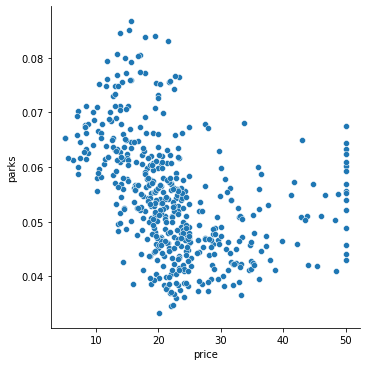

In [21]:
sns.relplot(x="price", y="parks", data=df)

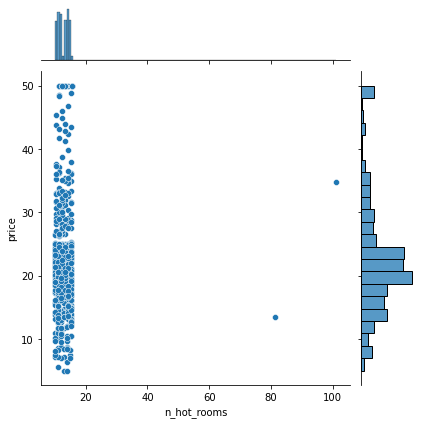

In [6]:
sns.jointplot(x='n_hot_rooms', y='price', data=df)

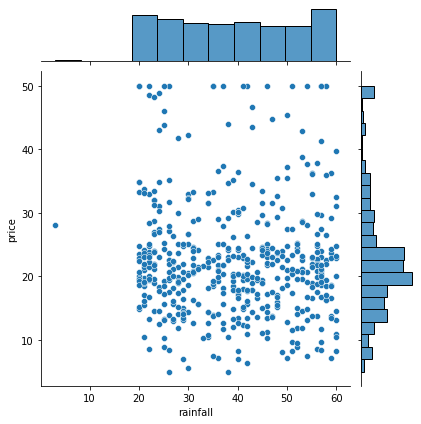

In [7]:
sns.jointplot(x='rainfall', y='price', data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

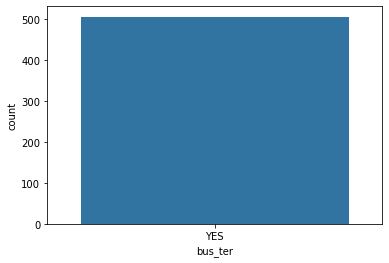

In [8]:
sns.countplot(x='bus_ter', data=df)

### Observations
1.  Missing values in hos_rooms
2.  Outliers in Crime rate
3.  Outliers in Hot_rooms and rainfall
4.  Bus terminal take only 1 value - 'YES'

## Treating Outliers by Capping and Flooring Method

In [9]:
#setting upper value for outliers on hotel rooms
uv=np.percentile(df.n_hot_rooms,[99])[0]

In [10]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [11]:
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv #we cap the outliers to 3*uv

<ipython-input-11-f568aacd800a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv #we cap the outliers to 3*uv


In [12]:
df[(df.n_hot_rooms>uv)] #we see the values of outliers have changed

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [13]:
#setting lower value for outlier in rainfall
lv = np.percentile(df.rainfall,[1])[0]

In [14]:
df[(df.rainfall < lv)] #to check all values below P1 ie. outliers

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [15]:
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

<ipython-input-15-0dd828a01160>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv


In [16]:
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


## Replacing Missing Values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [18]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Converting Cateogical data to Numerical data

In [20]:
df = pd.get_dummies(df)

In [21]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,n_hot_rooms,rainfall,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,11.19200,23,0.049347,0,1,0,0,0,1,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,12.17280,42,0.046146,1,0,1,0,0,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,46.19856,38,0.045764,1,0,0,0,1,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,11.26720,45,0.047151,0,1,1,0,0,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,11.28960,55,0.039474,1,0,1,0,0,0,1


## Removing Unwanted columns from the data

In [22]:
df = df.drop(['waterbody_None', 'airport_NO'], axis=1) #Same data represented twice

In [23]:
df = df.drop(['bus_ter_YES'], axis=1) #Represents only one value

In [24]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4 

In [25]:
df= df.drop(['dist1','dist2','dist3','dist4'], axis=1) #Replaced by avg_dist

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     506 non-null    float64
 1   crime_rate                506 non-null    float64
 2   resid_area                506 non-null    float64
 3   air_qual                  506 non-null    float64
 4   room_num                  506 non-null    float64
 5   age                       506 non-null    float64
 6   teachers                  506 non-null    float64
 7   poor_prop                 506 non-null    float64
 8   n_hos_beds                506 non-null    float64
 9   n_hot_rooms               506 non-null    float64
 10  rainfall                  506 non-null    int64  
 11  parks                     506 non-null    float64
 12  airport_YES               506 non-null    uint8  
 13  waterbody_Lake            506 non-null    uint8  
 14  waterbody_

In [27]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,avg_dist
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,1,0,0,1,4.0875
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,0,1,0,0,4.9675
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,0,0,0,4.9675
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,1,1,0,0,6.0650
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,1,0,0,6.0625


## Scaling the data

In [28]:
'''sig_num_col = ['price','crime_rate','resid_area','air_qual','room_num','age','teachers','poor_prop','n_hos_beds','n_hot_rooms','rainfall','parks','avg_dist']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df[sig_num_col]=pd.DataFrame(scaler.fit_transform(df[sig_num_col]),columns=df[sig_num_col].columns)
df.head()'''

"sig_num_col = ['price','crime_rate','resid_area','air_qual','room_num','age','teachers','poor_prop','n_hos_beds','n_hot_rooms','rainfall','parks','avg_dist']\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler=MinMaxScaler()\n\ndf[sig_num_col]=pd.DataFrame(scaler.fit_transform(df[sig_num_col]),columns=df[sig_num_col].columns)\ndf.head()"

## Multiple Linear Regression

In [29]:
X = df.drop("price", axis = 1)#since col is dropped axis = 1
y = df['price']

In [30]:
X.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,avg_dist
0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,1,0,0,1,4.0875
1,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,0,1,0,0,4.9675
2,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,0,0,0,4.9675
3,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,1,1,0,0,6.0650
4,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,1,0,0,6.0625


In [31]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

### Splitting training and Testing dataset 

Transformation : (y^0.25)


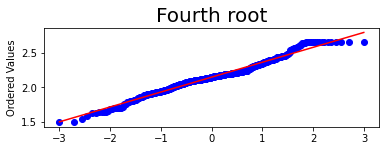

In [32]:
import math
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(y.transform(lambda x:x**(1/4)), dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Fourth root', size=20)
print("Transformation : (y^0.25)")

Lambda =  0.21897939278699172


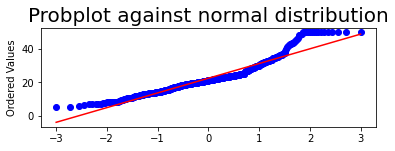

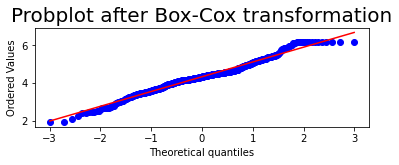

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(y, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution', size=20)

fig = plt.figure()
ax2 = fig.add_subplot(212)
y, lam= stats.boxcox(y) #returns data,lambda
prob = stats.probplot(y, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation', size=20)
print("Lambda = ", lam)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100) #random state to get same train and test set each time
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 16) (102, 16) (404,) (102,)


### Model Specification 

In [35]:
import statsmodels.api as sm

# Adding a constant to get an intercept (beta 0)
X_train_sm = sm.add_constant(X_train)

In [36]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [37]:
# Printing the parameters
lr.params

const                       3.086128
crime_rate                 -0.015219
resid_area                 -0.005942
air_qual                   -1.620518
room_num                    0.226318
age                        -0.001145
teachers                    0.070385
poor_prop                  -0.052783
n_hos_beds                  0.018770
n_hot_rooms                 0.003796
rainfall                    0.002590
parks                       5.692939
airport_YES                 0.090445
waterbody_Lake              0.036224
waterbody_Lake and River   -0.061770
waterbody_River            -0.044730
avg_dist                   -0.097571
dtype: float64

In [38]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     79.48
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          1.84e-111
Time:                        18:26:17   Log-Likelihood:                -175.72
No. Observations:                 404   AIC:                             385.4
Df Residuals:                     387   BIC:                             453.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.0861      0.459      6.719      0.000       2.183       3.989
crime_rate                  -0.0152      0.003     -5.023      0.000      -0.021      -0.009
resid_area                  -0.0059      0.005     -1.192      0.234      -0.016       0.004
air_qual                    -1.6205      0.484     -3.349      0.001      -2.572      -0.669
room_num                     0.2263      0.037      6.178      0.000       0.154       0.298
age                         -0.0011      0.001     -0.965      0.335      -0.003       0.001
teachers                     0.0704      0.011      6.702      0.000       0.050       0.091
poor_prop                   -0.0528      0.005    -11.640      0.000      -0.062      -0.044
n_hos_beds                   0.0188      0.013      1.434      0.152      -0.007       0.045
n_hot_rooms                  0.0038      0.007      0.567      0.571      -0.009       0.017
rainfall                     0.0026      0.002      1.636      0.103      -0.001       0.006
parks                        5.6929      4.492      1.267      0.206      -3.139      14.525
airport_YES                  0.0904      0.039      2.307      0.022       0.013       0.168
waterbody_Lake               0.0362      0.056      0.646      0.519      -0.074       0.146
waterbody_Lake and River    -0.0618      0.062     -0.995      0.320      -0.184       0.060
waterbody_River             -0.0447      0.048     -0.939      0.348      -0.138       0.049
avg_dist                    -0.0976      0.017     -5.775      0.000      -0.131      -0.064
==============================================================================
Omnibus:                       74.797   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.542
Skew:                           0.882   Prob(JB):                     1.04e-44
Kurtosis:                       5.986   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X_train = X_train.drop(['waterbody_Lake','parks','waterbody_Lake and River','waterbody_River','rainfall','n_hos_beds','n_hot_rooms', 'resid_area','age'], axis=1)

In [40]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          2.36e-118
Time:                        18:26:17   Log-Likelihood:                -181.79
No. Observations:                 404   AIC:                             379.6
Df Residuals:                     396   BIC:                             411.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1870      0.358      8.890      0.000       2.482       3.892
crime_rate     -0.0149      0.003     -4.937      0.000      -0.021      -0.009
air_qual       -1.4038      0.280     -5.009      0.000      -1.955      -0.853
room_num        0.2228      0.036      6.184      0.000       0.152       0.294
teachers        0.0731      0.010      7.308      0.000       0.053       0.093
poor_prop      -0.0548      0.004    -12.941      0.000      -0.063      -0.046
airport_YES     0.0959      0.039      2.468      0.014       0.020       0.172
avg_dist       -0.0893      0.015     -6.028      0.000      -0.118      -0.060
==============================================================================
Omnibus:                       79.469   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.676
Skew:                           0.932   Prob(JB):                     5.40e-48
Kurtosis:                       6.075   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

In [42]:
y_train_pred

379    3.496389
311    4.888009
157    5.393590
244    3.957887
56     4.652475
         ...   
343    4.827729
359    3.934284
323    4.285324
280    5.517492
8      3.428741
Length: 404, dtype: float64

## Visualization

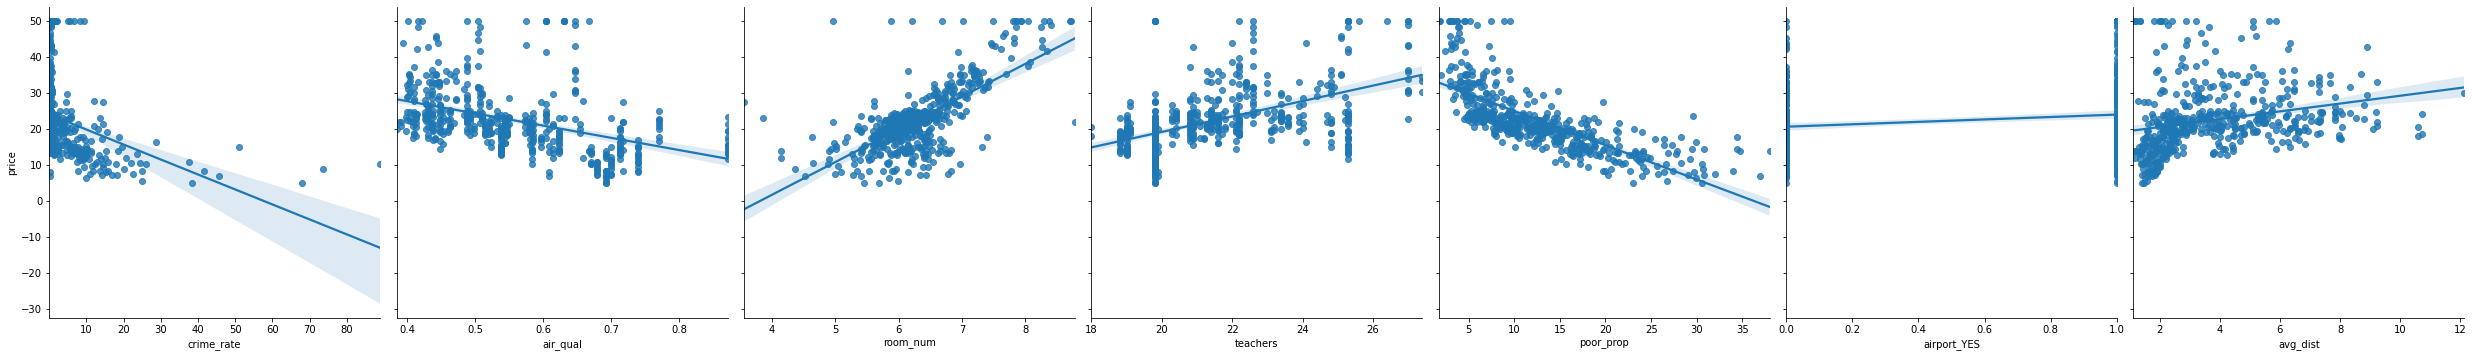

In [43]:
sns.pairplot(df,x_vars=['crime_rate','air_qual','room_num','teachers','poor_prop','airport_YES','avg_dist'], 
             y_vars='price', height = 5, kind = 'reg', diag_kind = None)

## Assumption Testing

### Test of Normality

Text(0.5, 0.98, 'Histogram Plots')

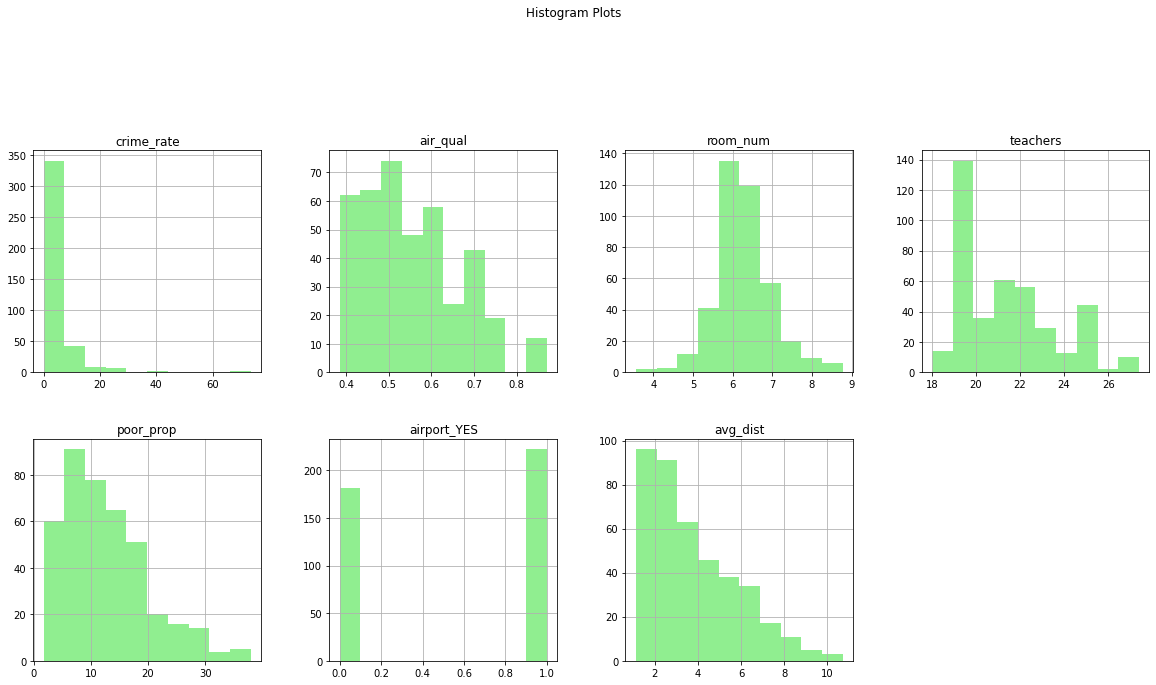

In [44]:
# Histogram Plot
X_train.hist(layout=(4,4), color = 'lightgreen', figsize = (20,20), grid = True)
plt.suptitle('Histogram Plots')

C:\Users\arund\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram Plot')

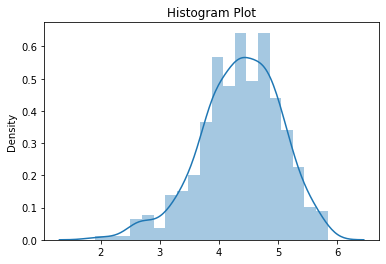

In [45]:
sns.distplot(y_train_pred, bins = 20).set_title('Histogram Plot')

In [46]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(X_train)
print('Statistic = ',stat,'\np-value = ', p)
if p>0.05: print('Probably Normal')
else: print('Probably not Normal')

Statistic =  0.7894411683082581 
p-value =  0.0
Probably not Normal


### Test of Linearity

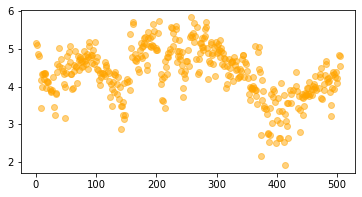

In [47]:
# Scatter Plot
plt.subplots(figsize=(6,3))
plt.scatter(x=y_train_pred.index, y = y_train_pred, alpha=0.5, color='orange')
plt.show() 

In [48]:
# Ramsey-Reset Test
import statsmodels.regression.linear_model as rg
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as dg

reset = dg.linear_reset(lr, power = 2, test_type='exog', use_f=True)

print("Ramsey Reset test: f stat:", np.round(reset.fvalue,6))
print("Ramsey Reset test: p value:", np.round(reset.pvalue,6))

Ramsey Reset test: f stat: [[17.713574]]
Ramsey Reset test: p value: 0.0


### Test of Homoscedasticity

C:\Users\arund\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual of Training data')

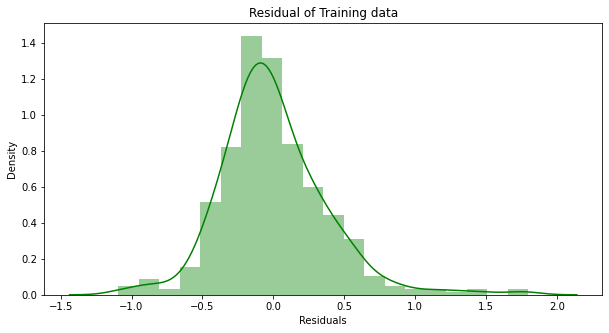

In [49]:
#Plotting the error term (Residual Plot)
plt.subplots(figsize=(10,5))
sns.distplot(y_train - y_train_pred, bins=20, color='green').set_xlabel( "Residuals")
plt.title('Residual of Training data')

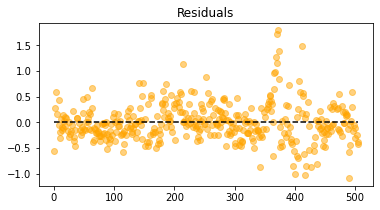

In [50]:
plt.subplots(figsize=(6,3))
plt.scatter(x=y_train_pred.index, y = lr.resid, alpha=0.5, color='orange')
plt.plot(np.repeat(0, y_train_pred.index.max()), color='black', linestyle='--')
plt.title('Residuals')
plt.show()  

In [51]:
import statsmodels 
# Breusch-Pagan Test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = statsmodels.stats.diagnostic.het_breuschpagan(lr.resid, X_train)
for i in range(4):
    print(names[i], '=', test[i])

Lagrange multiplier statistic = 89.27938085732919
p-value = 4.27654064275458e-17
f-value = 16.088606867037598
f p-value = 1.2133493073120702e-18


### Test of Multicollinearity

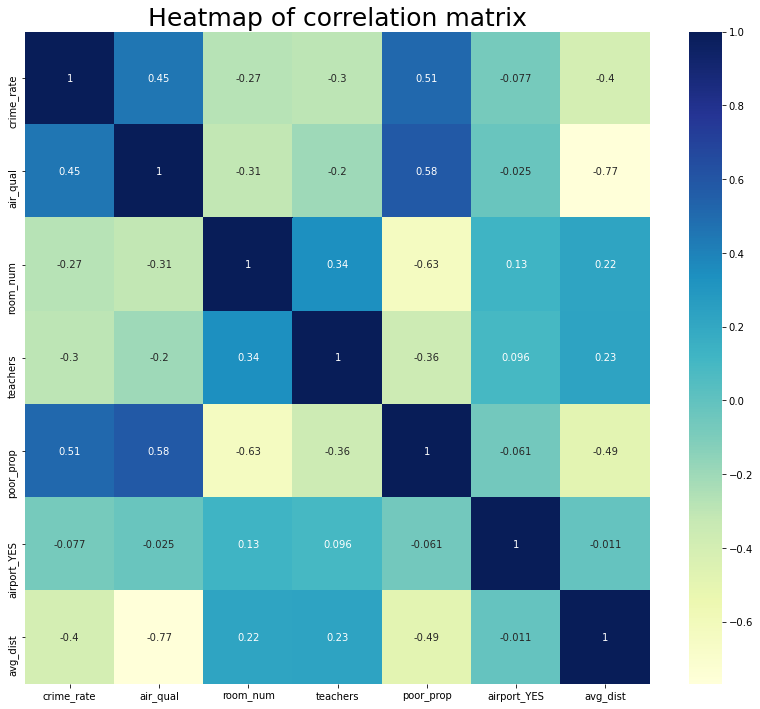

In [52]:
#Heatmap
plt.figure(figsize = (14,12))
sns.heatmap(X_train.corr(), cmap="YlGnBu",annot=True).set_title('Heatmap of correlation matrix', size=25)
plt.show()

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    return(vif)
calc_vif(df.iloc[:,:-1])

,variables,VIF
0,crime_rate,1.748186
1,air_qual,54.933818
2,room_num,86.774488
3,teachers,102.454500
4,poor_prop,8.345582
5,airport_YES,2.278420
6,avg_dist,8.810021


In [54]:
X_train.corr()

,crime_rate,air_qual,room_num,teachers,poor_prop,airport_YES,avg_dist
crime_rate,1.000000,0.451575,-0.271933,-0.298510,0.513115,-0.076557,-0.397665
air_qual,0.451575,1.000000,-0.308452,-0.201325,0.582793,-0.024628,-0.768561
room_num,-0.271933,-0.308452,1.000000,0.339261,-0.631274,0.127411,0.219458
teachers,-0.298510,-0.201325,0.339261,1.000000,-0.357940,0.096292,0.228290
poor_prop,0.513115,0.582793,-0.631274,-0.357940,1.000000,-0.061083,-0.490996
airport_YES,-0.076557,-0.024628,0.127411,0.096292,-0.061083,1.000000,-0.011358
avg_dist,-0.397665,-0.768561,0.219458,0.228290,-0.490996,-0.011358,1.000000


## Predictions on the Test data

In [55]:
X_test = X_test.drop(['n_hos_beds','waterbody_Lake','parks','rainfall','n_hot_rooms','waterbody_Lake and River','waterbody_River','resid_area','age'], axis=1)
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test

,crime_rate,air_qual,room_num,teachers,poor_prop,airport_YES,avg_dist
198,0.03768,0.404,7.274,27.4,6.62,0,7.3100
229,0.44178,0.504,6.552,22.6,3.76,1,3.3725
502,0.04527,0.573,6.120,19.0,9.08,1,2.2875
31,1.35472,0.538,6.072,19.0,13.04,1,4.1750
315,0.25356,0.544,5.705,21.6,11.50,0,3.9450
...,...,...,...,...,...,...,...
166,2.01019,0.605,7.929,25.3,3.70,1,2.0475
401,14.23620,0.693,6.343,19.8,20.32,1,1.5750
368,4.89822,0.631,4.970,19.8,3.26,0,1.3325
140,0.29090,0.624,6.174,18.8,24.16,0,1.6125


In [56]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test
# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

In [57]:
y_test_pred

198    5.228216
229    5.174321
502    4.529121
31     4.162382
315    4.287797
         ...   
166    5.635204
401    3.705390
368    4.486245
140    3.589114
428    3.695601
Length: 102, dtype: float64

## Model Evaluation 

In [58]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7963804145853322

C:\Users\arund\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual of Testing data')

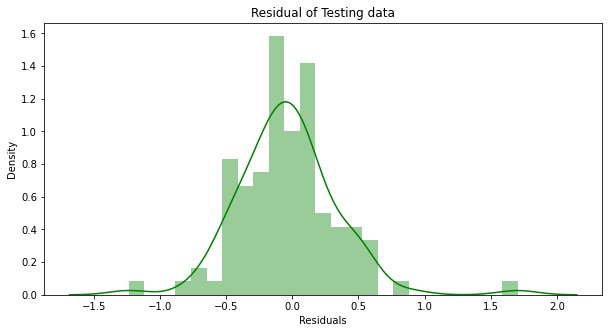

In [59]:
plt.subplots(figsize=(10,5))
sns.distplot(y_test - y_test_pred, bins=25, color='green').set_xlabel( "Residuals")
plt.title('Residual of Testing data')

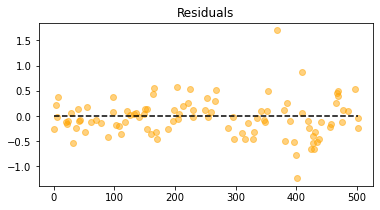

In [60]:
plt.subplots(figsize=(6,3))
plt.scatter(x=y_test_pred.index, y=y_test - y_test_pred, alpha=0.5, color='orange')
plt.plot(np.repeat(0, y_test_pred.index.max()), color='black', linestyle='--')
plt.title('Residuals')
plt.show()  